## Image Prediction using Convoluation Neural Network Assignment 1

In [2]:
# Importing, the Library
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tf.__version__

'2.6.0'

In [4]:
# Processing the Training Dataset
train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
trainingSet = train.flow_from_directory('C:\\Users\\kapad\\Desktop\\CDSP\\MODULE 6 DEEP LEARNING\\Convolutional Neural Networks (CNN) (1)\\Convolutional Neural Networks (CNN) (1)\\dataset\\training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [5]:
# Processing the Training Dataset
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:\\Users\\kapad\\Desktop\\CDSP\\MODULE 6 DEEP LEARNING\\Convolutional Neural Networks (CNN) (1)\\Convolutional Neural Networks (CNN) (1)\\dataset\\test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


# Building the CNN Model

In [6]:
# Initialising the CNN

cnn = tf.keras.models.Sequential()

In [7]:
# Step 1 - Convolution

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [8]:
# Step 2 - Pooling

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [9]:
# Adding a second convolutional layer

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
# Step 3 - Flattening

cnn.add(tf.keras.layers.Flatten())

In [11]:
# Step 4 - Full Connection

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [12]:
# Step 5 - Output Layer

cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Training the CNN

In [13]:
# Compiling the CNN

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
# Training the CNN on the Training set and evaluating it on the Test set

cnn.fit(x = trainingSet, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 46s 183ms/step - loss: 0.6530 - accuracy: 0.6051 - val_loss: 0.5973 - val_accuracy: 0.6930
Epoch 2/25
250/250 [==============================] - 33s 132ms/step - loss: 0.5828 - accuracy: 0.6919 - val_loss: 0.5408 - val_accuracy: 0.7260
Epoch 3/25
250/250 [==============================] - 32s 129ms/step - loss: 0.5485 - accuracy: 0.7214 - val_loss: 0.5350 - val_accuracy: 0.7290
Epoch 4/25
250/250 [==============================] - 34s 134ms/step - loss: 0.5247 - accuracy: 0.7351 - val_loss: 0.5109 - val_accuracy: 0.7590
Epoch 5/25
250/250 [==============================] - 36s 145ms/step - loss: 0.5064 - accuracy: 0.7508 - val_loss: 0.5022 - val_accuracy: 0.7595
Epoch 6/25
250/250 [==============================] - 35s 141ms/step - loss: 0.4864 - accuracy: 0.7586 - val_loss: 0.5218 - val_accuracy: 0.7560
Epoch 7/25
250/250 [==============================] - 35s 139ms/step - loss: 0.4761 - accuracy: 0.7724 - val_loss: 0.4889 - val_ac

# Virtualize Training

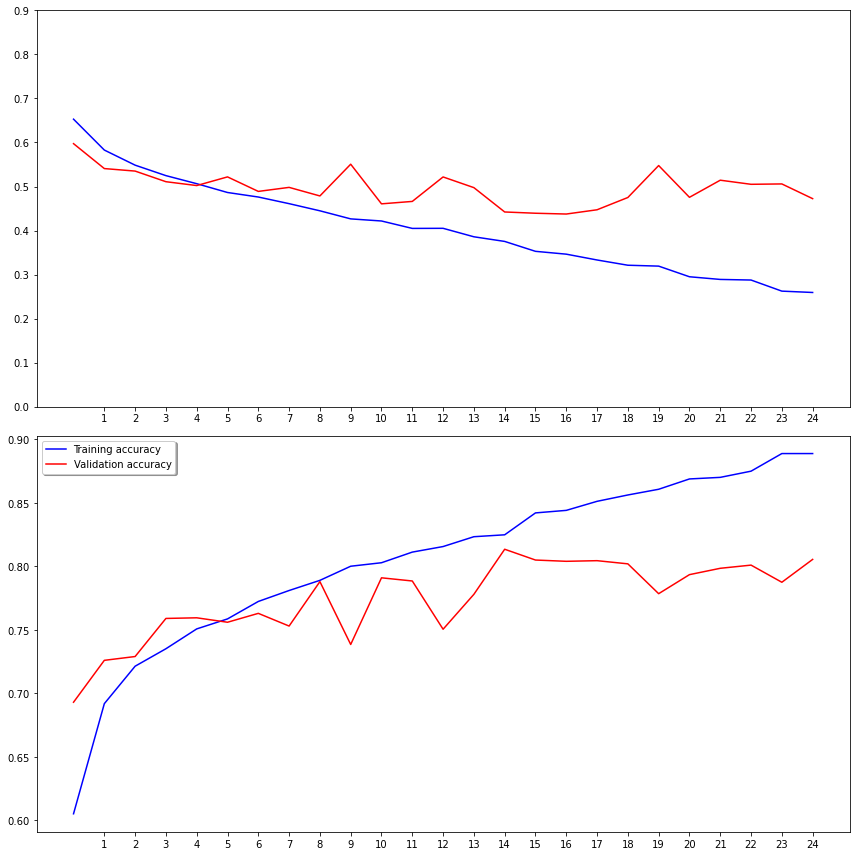

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(cnn.history.history['loss'], color='b', label="Training loss")
ax1.plot(cnn.history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 25, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(cnn.history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(cnn.history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 25, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Making a single prediction

In [17]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('C:\\Users\\kapad\\Desktop\\CDSP\\MODULE 6 DEEP LEARNING\\Convolutional Neural Networks (CNN) (1)\\Convolutional Neural Networks (CNN) (1)\\dataset\\single_prediction\\cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)

trainingSet.class_indices

if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)

cat


In [18]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('C:\\Users\\kapad\\Desktop\\CDSP\\MODULE 6 DEEP LEARNING\\Convolutional Neural Networks (CNN) (1)\\Convolutional Neural Networks (CNN) (1)\\dataset\\single_prediction\\cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)

trainingSet.class_indices

if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)

dog


In [19]:
cnn.save_weights("model.h5")